In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('pl_22_23.csv', encoding='utf-8')
df_22 = pd.read_csv('pl_23_24.csv', encoding='utf-8')

In [3]:
df.head(3)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,...,1.76,0.50,2.09,1.84,2.04,1.88,2.09,1.88,2.03,1.85
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,...,2.73,1.75,1.90,2.03,1.91,2.02,2.01,2.06,1.89,1.99
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,...,1.76,0.50,1.93,2.00,1.93,2.00,1.94,2.04,1.88,2.00


In [4]:
df['HomeTeam'].value_counts()

HomeTeam
Crystal Palace    19
Fulham            19
Chelsea           19
Nott'm Forest     19
Brentford         19
Wolves            19
Southampton       19
Man City          19
Brighton          19
Arsenal           19
Aston Villa       19
West Ham          19
Man United        19
Leicester         19
Everton           19
Tottenham         19
Newcastle         19
Leeds             19
Bournemouth       19
Liverpool         19
Name: count, dtype: int64

In [5]:
df.shape

(380, 106)

In [6]:
df.dtypes

Div          object
Date         object
Time         object
HomeTeam     object
AwayTeam     object
             ...   
PCAHA       float64
MaxCAHH     float64
MaxCAHA     float64
AvgCAHH     float64
AvgCAHA     float64
Length: 106, dtype: object

In [7]:
df.Date = pd.to_datetime(df['Date'], dayfirst=True)

In [8]:
df['Day_code'] = df['Date'].dt.dayofweek
df.Day_code

0      4
1      5
2      5
3      5
4      5
      ..
375    6
376    6
377    6
378    6
379    6
Name: Day_code, Length: 380, dtype: int32

In [9]:
df['Time_code'] = df['Time'].apply(lambda x: x[:2]).astype('int64')

In [10]:
df.Time_code

0      20
1      12
2      15
3      15
4      15
       ..
375    16
376    16
377    16
378    16
379    16
Name: Time_code, Length: 380, dtype: int64

In [11]:
df['Win'] = np.where(df.FTR == 'H', 1, 0)
df.Win.head(3)

0    0
1    0
2    1
Name: Win, dtype: int32

In [12]:
encoder = LabelEncoder()
df['H_Team_code'] = encoder.fit_transform(df.HomeTeam)
df['A_Team_code'] = encoder.fit_transform(df.AwayTeam)

In [13]:
features = ['Day_code', 'Time_code', 'H_Team_code', 'A_Team_code', 'Win']

In [14]:
df[features]

,Day_code,Time_code,H_Team_code,A_Team_code,Win
0,4,20,6,0,0
1,5,12,8,11,0
2,5,15,2,1,1
3,5,15,9,19,1
4,5,15,14,15,1
...,...,...,...,...,...
375,6,16,7,2,1
376,6,16,9,17,0
377,6,16,10,18,1
378,6,16,13,8,1


In [15]:
target = 'Win'
X = df[features].drop(target, axis=1)
y = df[target]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=42)

In [17]:
X_train

,Day_code,Time_code,H_Team_code,A_Team_code
45,2,19,2,19
244,5,15,4,18
118,5,15,3,19
73,5,17,18,19
227,5,15,19,2
...,...,...,...,...
71,5,15,11,4
106,5,12,15,11
270,5,12,12,11
348,5,15,1,17


In [18]:
y_train

45     0
244    1
118    0
73     1
227    0
      ..
71     0
106    1
270    1
348    1
102    1
Name: Win, Length: 323, dtype: int32

In [19]:
scaler = StandardScaler()
scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=15)
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
y_pred = model_log.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy is {accuracy}')

Accuracy is 0.47368421052631576


In [20]:
np.random.seed(0)
accuracy_train=[]
accuracy_test = []
depths = range(1,20)
for depth in depths:
  model = RandomForestClassifier(max_depth=depth)
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  accuracy_train.append(accuracy_score(y_train, y_pred_train))
  accuracy_test.append(accuracy_score(y_test, y_pred_test))
best_acc = np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]
print('Best accuracy with using Randomforest is: ', best_acc, ' and the best depth is: ', best_depth)

Best accuracy with using Randomforest is:  0.6842105263157895  and the best depth is:  2


In [21]:
y_pred_new = model.predict(X_test)
y_pred_new
model.estimator_

DecisionTreeClassifier()

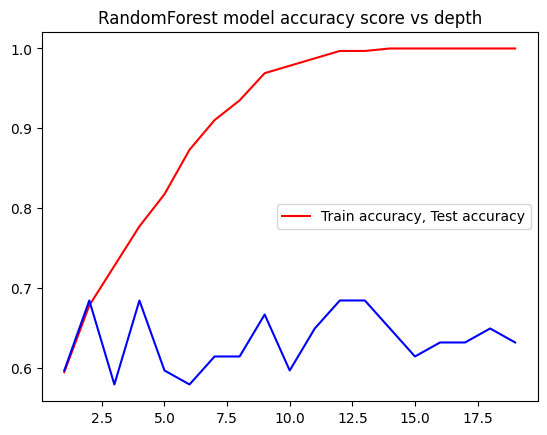

In [22]:
plt.plot(depths, accuracy_train, 'r', depths, accuracy_test, 'b')
plt.title('RandomForest model accuracy score vs depth')
plt.legend(['Train accuracy, Test accuracy'])
plt.show()